# Neural Network Classification Model With PyTorch

In [1]:
# importing
try: 
    import torch
    import numpy
    import matplotlib.pyplot as plt
    from torch import nn # nn-> all te building blocks for a neural network
    from pathlib import Path
    import sklearn
    from sklearn.datasets import make_circles # to create a toy dataset
    from sklearn.model_selection import train_test_split
    import pandas as pd
    print("Done Successfully")
except Exception as e:
    print("Failed to import",e)


Done Successfully


# 1. Make classification data and get it ready


In [2]:
# make 1000 samples 
n=1000
# create circles 
X, y= make_circles(n,
                   noise=0.03,
                  random_state=42) 

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
# check samples of the data created
print(f'First 5 samples of X: \n {X[:5]}')
print(f'First 5 samples of y: \n {y[:5]}')

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [5]:
# make dataframes with pandas 
circles=pd.DataFrame({"X1:": X[:,0],
                     "X2:": X[:,1],
                     "Labels:": y})
circles.head(10) # shows first 10, defaukt is 5


,X1:,X2:,Labels:
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


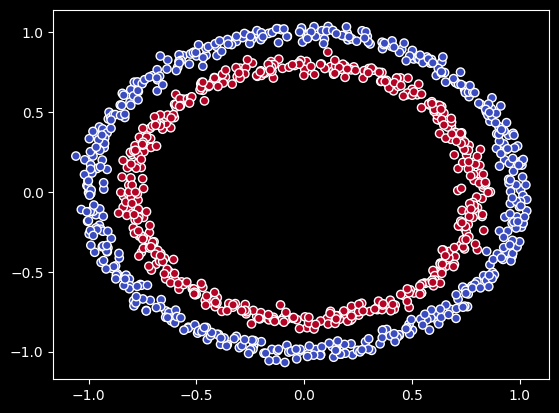

In [6]:
# visualise our data
plt.style.use("dark_background")

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap="coolwarm",
    edgecolors="white"
)

plt.show()


In [7]:
# check the shape of x and y
print(f'Shape of X: {X.shape} \t Shape of y: {y.shape}')

# view the first sample of features(X) and labels(y)
print(f'Sample of X:{X[0]} \t Sample of y: {y[0]}')
print(f'Shape of X: {X[0].shape} \t Shape of y: {y[0].shape}')


Shape of X: (1000, 2) 	 Shape of y: (1000,)
Sample of X:[0.75424625 0.23148074] 	 Sample of y: 1
Shape of X: (2,) 	 Shape of y: ()


In [8]:
# turn the data into tensors 
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

# view the first 5 
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# split into training and testing randomly by sklearn's train_test_split method 
X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y, 
                                                   test_size=0.2, # percentage of data to be used for testing purpose, eg 0.5 would be for a 50-50 split
                                                   random_state=42)
print(len(X_train),len(X_test), len(y_train), len(y_test)) 

800 200 800 200


# Build, train and test.
- Define device agnostic code so that our code runs on an accelerator(GPU) when available.
- Set up a model class with `nn.Module` as inherited class.
- Define loss and optimizer.
- Create training and testing loops.

In [10]:
# device agnostic code 
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [11]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

# Steps to create our model:
- Set up a model class with nn.Module as inherited class.
- Create 2 nn.Linear() layers capable of handling the shapes of data
- Define a forward method that outlines the forward pass
- Create an object of the class and send it to the target device 

In [12]:
# creating model class
class Circle_Point_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # create two layers to handle the shapes of our data 
        self.layer_1=nn.Linear(in_features=2, out_features=5)
        self.layer_2=nn.Linear(in_features=5, out_features=1)

        # define a forward function :
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2                            

In [13]:
# instantiate and send it to the device 
model_2=Circle_Point_Classifier().to(device)
model_2

Circle_Point_Classifier(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
device


'cpu'

In [15]:
# replicate the model using nn.sequential
repli_model=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

repli_model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5385, -0.3454],
                      [-0.1878, -0.3592],
                      [-0.2401, -0.5783],
                      [-0.2395, -0.1867],
                      [ 0.3937,  0.6370]])),
             ('layer_1.bias',
              tensor([ 0.6591, -0.2797, -0.3463,  0.4362,  0.4792])),
             ('layer_2.weight',
              tensor([[-0.1892, -0.1453,  0.1776, -0.2826, -0.4070]])),
             ('layer_2.bias', tensor([0.3004]))])

# Setting up optimizer and loss function
- Here we're going with the BCEWithLogitsLoss() and adam optimizer

In [17]:
# set up loss function
loss_fn=nn.BCEWithLogitsLoss() # has sigmoid activation function inside

# set up the optimizer
optimizer= torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [18]:
# calculate accuracy ~per 100 predictions 
def accuracy_fn(y_true, y_pred):
    right=torch.eq(y_true, y_pred).sum().item()
    acc=(right/len(y_pred))*100
    return acc
    


# Training the model

In [19]:
# before training the model,lets see whats coming out of the forward pass on the test data..
y_logits=model_2(X_test.to(device))[:5]
y_logits, y_test[:5]

(tensor([[-0.2156],
         [-0.3507],
         [ 0.0442],
         [-0.2889],
         [-0.1054]], grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1.]))

In [20]:
# we can see that the model is returning raw numbers(unknown/ logits). 
# convert these into probabilities using the sigmoid function

y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4463],
        [0.4132],
        [0.5111],
        [0.4283],
        [0.4737]], grad_fn=<SigmoidBackward0>)

In [21]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_2.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_2(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_2(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70187, Accuracy: 46.25% | Test loss: 0.69460, Test acc: 52.00%
Epoch: 10 | Loss: 0.69751, Accuracy: 47.62% | Test loss: 0.69180, Test acc: 53.50%
Epoch: 20 | Loss: 0.69583, Accuracy: 48.50% | Test loss: 0.69122, Test acc: 53.00%
Epoch: 30 | Loss: 0.69502, Accuracy: 49.62% | Test loss: 0.69126, Test acc: 53.00%
Epoch: 40 | Loss: 0.69453, Accuracy: 49.75% | Test loss: 0.69148, Test acc: 52.00%
Epoch: 50 | Loss: 0.69419, Accuracy: 49.88% | Test loss: 0.69174, Test acc: 52.00%
Epoch: 60 | Loss: 0.69393, Accuracy: 50.25% | Test loss: 0.69199, Test acc: 51.50%
Epoch: 70 | Loss: 0.69374, Accuracy: 50.75% | Test loss: 0.69224, Test acc: 50.50%
Epoch: 80 | Loss: 0.69359, Accuracy: 51.12% | Test loss: 0.69247, Test acc: 50.50%
Epoch: 90 | Loss: 0.69347, Accuracy: 51.12% | Test loss: 0.69269, Test acc: 50.50%


In [22]:
# looks like our model isnt learning anything, so lets make  some predictions and plot them 
# plot decision boundary
import requests
from pathlib import Path

# download helper function from pytorch repo if not already downloaded
if Path("helper_functions.py").is_file():
    print("Requirement alread satisfied")
else: 
    print("Downloading helper_functions.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Requirement alread satisfied


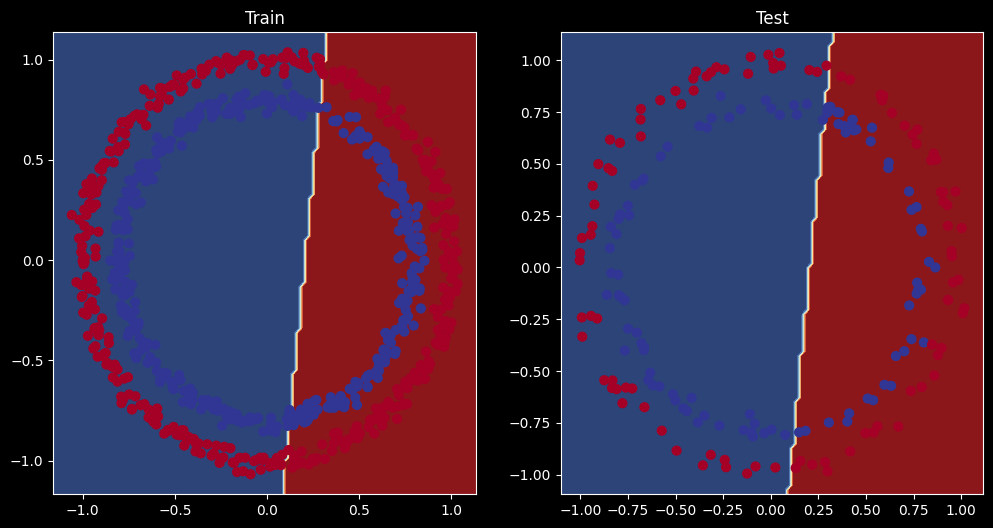

In [23]:
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

## 5. Improving a model (from a model perspective) 

Focusing specifically on the model (not the data), there are a few ways we could do this.

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data. More layers are often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model. More hidden units are often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/). |

In [24]:
'''
    Re-creating model class with changes : 
    - layers : 2->3
    - epochs: 100->1000
    - hidden features: 5->10
    change : one at a time and track the results when doing real projects
'''
class Circle_Point_Classifier_v1(nn.Module):
    def __init__(self):
        super().__init__()
        # create two layers to handle the shapes of our data 
        self.layer_1=nn.Linear(in_features=2, out_features=10)
        self.layer_2=nn.Linear(in_features=10, out_features=10)
        self.layer_3=nn.Linear(in_features=10, out_features=1)
        
        # define a forward function :
    def forward(self,x):
        z= self.layer_1(x)# x -> layer1 -> layer2 -> layer3
        z= self.layer_2(z)
        z= self.layer_3(z)
        
        return z

In [25]:
model_2_up=Circle_Point_Classifier_v1().to(device)
model_2_up

Circle_Point_Classifier_v1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [26]:
# create a loss function and optimizer
loss_fn= nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_2_up.parameters(),
                          lr=0.01)

In [27]:
# training and testing loog
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000
# put the data into the device 
X_train, X_test=X_train.to(device), X_test.to(device)
y_train, y_test=y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    model_2_up.train()
    y_logits=model_2_up(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
### Testing
    model_2_up.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_2_up(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69369, Accuracy: 50.25% | Test loss: 0.69269, Test acc: 50.00%
Epoch: 200 | Loss: 0.69351, Accuracy: 50.12% | Test loss: 0.69282, Test acc: 49.50%
Epoch: 300 | Loss: 0.69339, Accuracy: 50.50% | Test loss: 0.69295, Test acc: 49.00%
Epoch: 400 | Loss: 0.69329, Accuracy: 50.38% | Test loss: 0.69309, Test acc: 48.50%
Epoch: 500 | Loss: 0.69322, Accuracy: 49.88% | Test loss: 0.69322, Test acc: 49.50%
Epoch: 600 | Loss: 0.69317, Accuracy: 49.50% | Test loss: 0.69335, Test acc: 53.00%
Epoch: 700 | Loss: 0.69313, Accuracy: 49.38% | Test loss: 0.69347, Test acc: 50.50%
Epoch: 800 | Loss: 0.69309, Accuracy: 50.00% | Test loss: 0.69358, Test acc: 51.00%
Epoch: 900 | Loss: 0.69307, Accuracy: 50.62% | Test loss: 0.69368, Test acc: 47.50%


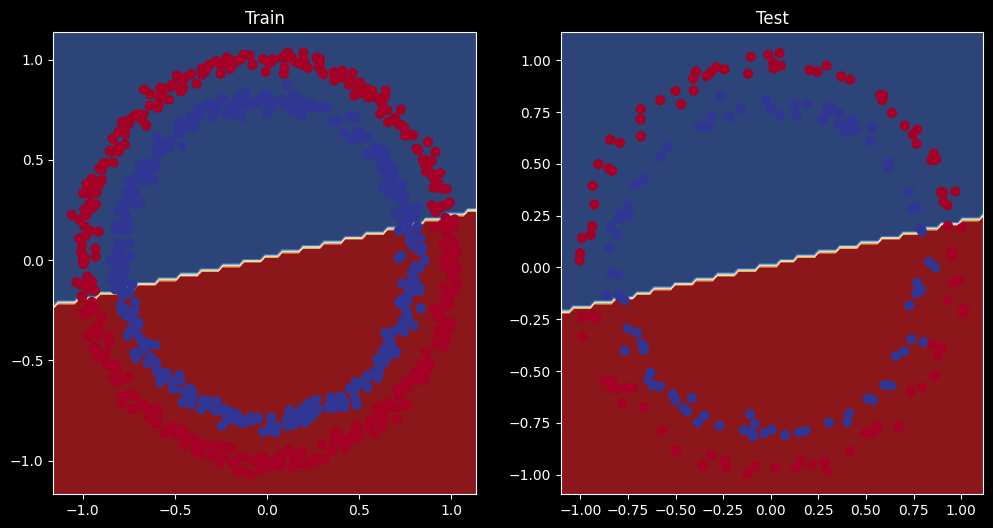

In [28]:
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2_up, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2_up, X_test, y_test)

In [ ]:
# the model is still behaving like its not learning anything but guessing. 
# lets get rid of this in next notebook - The missing piece.